In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
from typing import Tuple, Dict, List, Set, Optional, Any
load_dotenv()

True

In [93]:
root = "./excel/data.xlsx"

## Dates Format 

In [94]:
maintenance_orders_dates = ["scheduled_date", "completed_date","next_maintenance_date","created_at","updated_at"]
equipment_failures_dates = ["detected_date","resolved_date","created_at"]

### Months Orders

In [95]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

### Getting all data

In [96]:
users_df = pd.read_excel(root, sheet_name="users")
clients_df = pd.read_excel(root, sheet_name="clients")
client_equipment_df = pd.read_excel(root, sheet_name="client_equipment")
failure_types_df = pd.read_excel(root, sheet_name="failure_types")
equipment_failures_df = pd.read_excel(root, sheet_name="equipment_failures",parse_dates=equipment_failures_dates)
maintenance_types_df = pd.read_excel(root, sheet_name="maintenance_types")
maintenance_order_df = pd.read_excel(root, sheet_name="maintenance_order",parse_dates=maintenance_orders_dates)
inspections_df = pd.read_excel(root, sheet_name="inspections")

### Users Details

In [97]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           22 non-null     object 
 1   first_name   22 non-null     object 
 2   last_name    22 non-null     object 
 3   email        22 non-null     object 
 4   phone        22 non-null     object 
 5   gender       22 non-null     object 
 6   address      22 non-null     object 
 7   password     22 non-null     object 
 8   role         22 non-null     object 
 9   hourly_rate  22 non-null     float64
 10  is_active    22 non-null     bool   
 11  created_at   22 non-null     object 
 12  updated_at   22 non-null     object 
dtypes: bool(1), float64(1), object(11)
memory usage: 2.2+ KB


1. Counts Users by role

        Roles  Counts Percentage
0  Technician      10    62.50 %
1    Operator       4    25.00 %
2       Admin       2    12.50 %


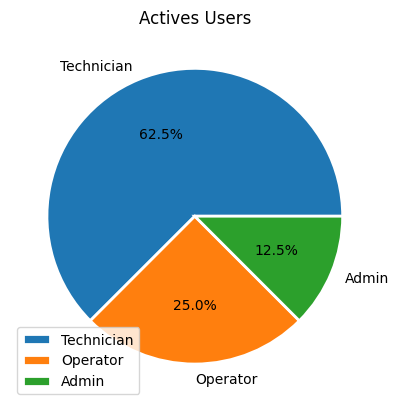

In [98]:
active_users = users_df["is_active"] == True #Filter active users
roles_counts = users_df.loc[active_users]["role"].value_counts().reset_index()
roles_counts.columns = ["Role", "Count"]
percent = [f"{x:.2f} %" for x in ((roles_counts["Count"] / roles_counts["Count"].sum())*100)]

users_by_roles = pd.DataFrame({
    "Roles": roles_counts["Role"],
    "Counts": roles_counts["Count"],
    "Percentage": percent
})

print(users_by_roles)
#Data
x: Any = users_by_roles["Roles"]
y = users_by_roles["Counts"]

#Pies charts
fig, ax = plt.subplots()
ax.pie(y, labels = x, autopct='%1.1f%%', wedgeprops={"linewidth":2,"edgecolor": "white"})
ax.legend()
plt.title('Actives Users')
plt.show()

### Clients Details

In [99]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           45 non-null     object
 1   first_name   45 non-null     object
 2   last_name    45 non-null     object
 3   email        45 non-null     object
 4   phone        45 non-null     object
 5   gender       45 non-null     object
 6   address      45 non-null     object
 7   client_type  45 non-null     object
 8   created_at   45 non-null     object
 9   updated_at   45 non-null     object
dtypes: object(10)
memory usage: 3.6+ KB


1. Counts Clients

  Type_of_Clients  Counts Percentage
0     Residential      30    66.67 %
1      Commercial      15    33.33 %


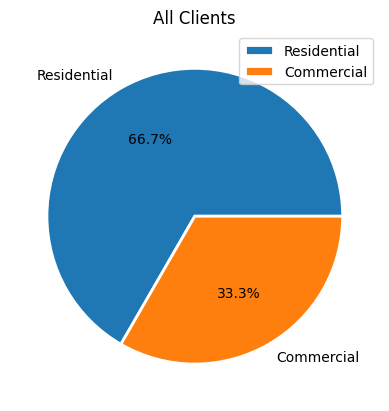

In [100]:
client_counts = clients_df["client_type"].value_counts().reset_index()
client_counts.columns = ["Type_of_Clients", "Count"]
percent_clients = [f"{x:.2f} %" for x in ((client_counts["Count"] / client_counts["Count"].sum())* 100)]

clients_by_type = pd.DataFrame({
    "Type_of_Clients": client_counts["Type_of_Clients"],
    "Counts": client_counts["Count"],
    "Percentage": percent_clients
})
print(clients_by_type)
#Data
x: Any = clients_by_type["Type_of_Clients"]
y = clients_by_type["Counts"]

#Pies charts
fig, ax = plt.subplots()
ax.pie(y, labels = x, autopct='%1.1f%%', wedgeprops={"linewidth":2,"edgecolor": "white"})
ax.legend()
plt.title('All Clients')
plt.show()

## Some Analyses

1. Question: List the first names, last names, and email addresses of all clients whose client_type is 'Commercial'.

In [101]:
commercial_clients = clients_df["client_type"] == "Commercial"
clients_df.loc[commercial_clients, ["first_name","last_name","email"]]

,first_name,last_name,email
30,Empresa,Venezolana S.A.,empresavenezolana31@gmail.com
31,Comercial,Maracaibo C.A.,comercialmaracaibo32@hotmail.com
32,Industrias,Valencia Ltda.,industriasvalencia33@outlook.com
33,Servicios,Lara S.R.L.,servicioslara34@gmail.com
34,Constructora,Aragua C.A.,constructoraaragua35@hotmail.com
35,Exportadora,Anzoátegui S.A.,exportadoraanzoategui36@outlook.com
36,Minería,Bolívar C.A.,mineriabolivar37@gmail.com
37,Agroindustrial,Monagas S.R.L.,agroindustrialmonagas38@hotmail.com
38,Tecnología,Táchira Ltda.,tecnologiatachira39@outlook.com
39,Pesquera,Sucre C.A.,pesquerasucre40@gmail.com


2. In the users sheet, create a new column full_name by concatenating first_name and last_name with a space in between.

In [102]:
users_df["full_name"] = users_df["first_name"] + " " + users_df["last_name"]
full_users = users_df[["first_name","last_name","full_name"]]

full_users.columns = [ x[0].upper() + x[1:len(x)] for x in full_users.columns]
full_users.head(10)

,First_name,Last_name,Full_name
0,Juan,Pérez,Juan Pérez
1,María,González,María González
2,Carlos,Rodríguez,Carlos Rodríguez
3,José,López,José López
4,Luis,Martínez,Luis Martínez
5,Pedro,García,Pedro García
6,Miguel,Hernández,Miguel Hernández
7,Antonio,Díaz,Antonio Díaz
8,Francisco,Silva,Francisco Silva
9,Rafael,Rojas,Rafael Rojas


3. Basic Grouping & Aggregation: Using the users sheet, calculate the average hourly_rate for each distinct role (Admin, Technician, Operator).

         Role  Average_hourly
0       Admin           21.25
1    Operator           10.67
2  Technician           31.64


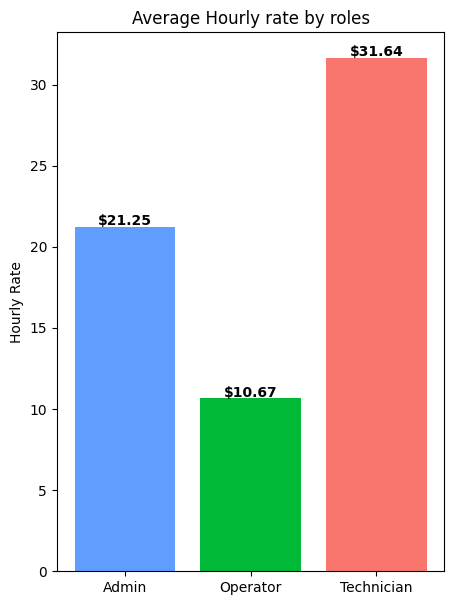

In [103]:
avg_user = users_df.groupby("role")["hourly_rate"].mean()
users_hourly_rate = pd.DataFrame({
    "Role": avg_user.index,
    "Average_hourly": avg_user.values
})
print(users_hourly_rate.round(2)) # type:ignore

#Bar Chart
fig, ax = plt.subplots(figsize=(5, 7))
x = users_hourly_rate["Role"]
y = users_hourly_rate["Average_hourly"]
colors = ["#619cff", "#00ba38", "#f8766d"]

# Add value labels on bars
for i, total in enumerate(y):
    plt.text(i, total + 0.1, f'${total:.2f}', ha='center', weight='bold', color='black')

ax.bar(x, y, color = colors)
ax.set_ylabel("Hourly Rate")
plt.title("Average Hourly rate by roles")
plt.show()

4. Simple Counting & Value Counts: In the clients sheet, count how many clients are of each gender. Display the counts and the percentages.

   Gender  Counts Percentage
0    Male      23    51.11 %
1  Female      22    48.89 %


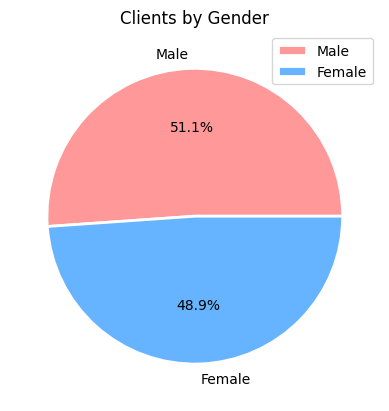

In [ ]:
clients_gender = clients_df["gender"].value_counts().reset_index()
clients_gender.columns = ["Gender", "Counts"]
percent_CG = [f"{x:.2f} %" for x in ((clients_gender["Counts"] / clients_gender["Counts"].sum())* 100)]


clients_by_gender = pd.DataFrame({
    "Gender": clients_gender["Gender"],
    "Counts": clients_gender["Counts"],
    "Percentage": percent_CG
})
print(clients_by_gender)
# Data visualization
x = clients_by_gender["Gender"]
y = clients_by_gender["Counts"]
colors = ["#ff9999","#66b3ff"]

#Pies charts
fig, ax = plt.subplots()
ax.pie(y, labels = x, autopct='%1.1f%%', wedgeprops={"linewidth":2,"edgecolor": "white"}, colors = colors) #type: ignore
ax.legend()
plt.title('Clients by Gender')
plt.show()


5. Data Cleaning - Handling Missing Values: Check all sheets for any missing values. Print a summary showing the count of missing values per column for each sheet. (Assume blank cells as missing).

In [ ]:
sheets = pd.ExcelFile(root).sheet_names

def show_files(sheets_list):
    show_sheet = []
    
    for sheet_name in sheets_list:
        result = pd.read_excel(root, sheet_name=sheet_name).isna().sum()
        missing_values = pd.DataFrame({
            "Sheet": sheet_name,
            "Column": result.index,
            "Missing_values": result.values
        })
        show_sheet.append(missing_values)

    combined_df = pd.concat(show_sheet, ignore_index=True)
    missing_values = combined_df[combined_df["Missing_values"] > 0]
    missing_values = missing_values.sort_values(["Sheet","Missing_values"], ascending=[True, False]) # type: ignore
    return missing_values
    
show_files(sheets)

,Sheet,Column,Missing_values
91,inspections,converted_to_maintenance_order_id,12
87,inspections,amps_reading,6
84,inspections,pressure_suction,2
71,maintenance_order,next_maintenance_date,40
63,maintenance_order,completed_date,30
65,maintenance_order,customer_feedback,30
66,maintenance_order,customer_rating,30
64,maintenance_order,technician_notes,14
77,maintenance_types,frequency_days,5


sheets = pd.ExcelFile(root).sheet_names

def show_files(x):
    result = pd.read_excel(root, sheet_name=x).isna().sum()
    print(f"""
    Sheet Name: {x}
    Missing Values: {result}
""")
    
result = [ show_files(x) for x in sheets ]
result

6. Merging DataFrames (Simple Join): Merge the maintenance_order sheet with the clients sheet on client_id to create a DataFrame that shows each maintenance order alongside the client's first and last name.

In [106]:
merged_Client_MO_df = pd.merge( maintenance_order_df, clients_df, left_on="client_id",right_on="id", how="inner")
merged_Client_MO_df.rename(columns={"id_x":"Maintenance_order_id"},inplace=True)
merged_Client_MO_df["Full_name"] = merged_Client_MO_df["first_name"] + " " + merged_Client_MO_df["last_name"]
merged_Client_MO_df[["Maintenance_order_id","Full_name"]].head(10)

,Maintenance_order_id,Full_name
0,MO-001,Juan Pérez
1,MO-002,María González
2,MO-003,Carlos Rodríguez
3,MO-004,Ana López
4,MO-005,José Martínez
5,MO-006,Carmen García
6,MO-007,Luis Hernández
7,MO-008,Isabel Sánchez
8,MO-009,Miguel Ramírez
9,MO-010,Patricia Torres


7. DateTime Operations (I): In the maintenance_order sheet, convert the scheduled_date and created_at columns to proper datetime format. Then, calculate the difference in days between when an order was created and when it was scheduled.

In [107]:
maintenance_ = (maintenance_order_df["scheduled_date"] - maintenance_order_df["created_at"]).dt.days
maintenance_delay_df = pd.DataFrame({
    "Maintenance_order_id": maintenance_order_df["id"],
    "Created_at": maintenance_order_df["created_at"],
    "Created_day": maintenance_order_df["created_at"].dt.day_name(),
    "Scheduled_date": maintenance_order_df["scheduled_date"],
    "Scheduled_day": maintenance_order_df["scheduled_date"].dt.day_name(),
    "Days_Between": maintenance_
})
maintenance_delay_df.head(10)

,Maintenance_order_id,Created_at,Created_day,Scheduled_date,Scheduled_day,Days_Between
0,MO-001,2021-10-13 09:00:00,Wednesday,2021-10-15,Friday,1
1,MO-002,2021-10-27 08:30:00,Wednesday,2021-10-29,Friday,1
2,MO-003,2021-11-10 10:00:00,Wednesday,2021-11-12,Friday,1
3,MO-004,2021-11-24 09:30:00,Wednesday,2021-11-26,Friday,1
4,MO-005,2021-12-08 08:00:00,Wednesday,2021-12-10,Friday,1
5,MO-006,2021-12-22 10:30:00,Wednesday,2021-12-24,Friday,1
6,MO-007,2022-01-05 11:00:00,Wednesday,2022-01-07,Friday,1
7,MO-008,2022-01-19 09:15:00,Wednesday,2022-01-21,Friday,1
8,MO-009,2022-02-02 08:45:00,Wednesday,2022-02-04,Friday,1
9,MO-010,2022-02-16 10:00:00,Wednesday,2022-02-18,Friday,1


8. Sorting: Sort the equipment_failures sheet by the detected_date column in descending order (most recent first). Extra Make a visualization by years and months.

Data: All Equiment Failures by Months
    Year    Months  Total_Failures
0   2021   October               3
1   2021  November               2
2   2021  December               1
3   2022   January               2
4   2022     March               4
5   2022       May               4
6   2022      July               2
7   2023     April               2
8   2023       May               2
9   2023      June               2
10  2023      July               2
11  2023    August               4


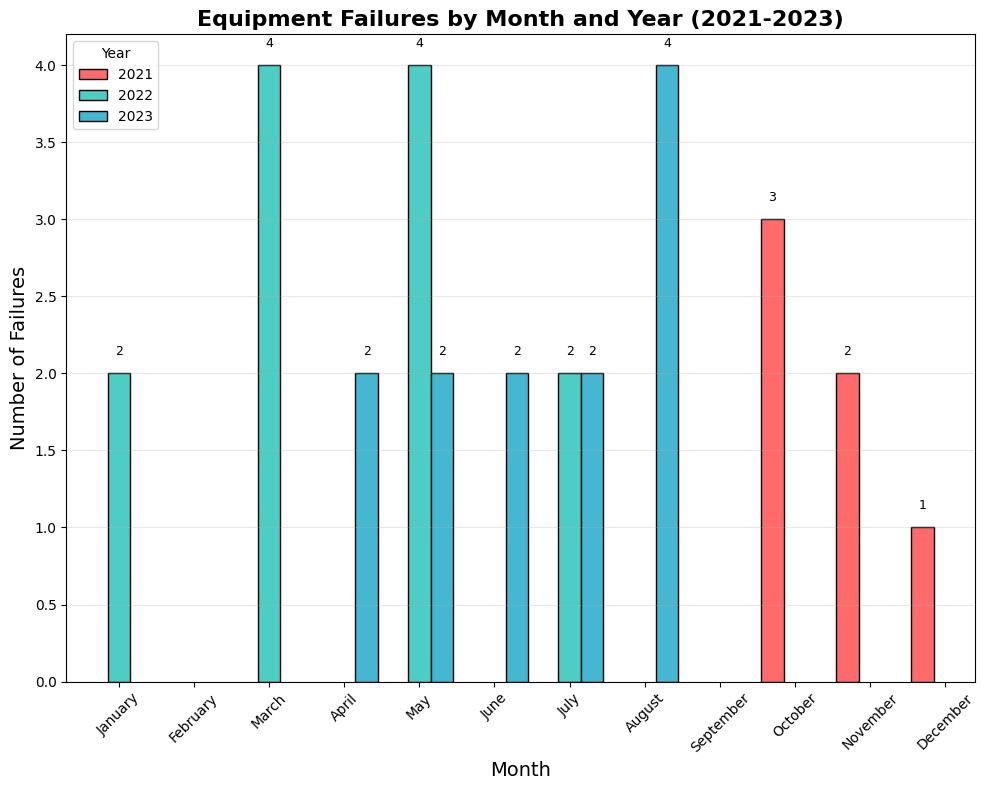

In [ ]:
equipment_failures_df[["month", "month_num","year"]] = pd.DataFrame({
    "month": equipment_failures_df["detected_date"].dt.month_name(),
    "month_num": equipment_failures_df["detected_date"].dt.month,
    "year": equipment_failures_df["detected_date"].dt.year
})
columns_eqf = ["maintenance_order_id","failure_type_id","severity_actual","repair_notes","detected_date","month","month_num","year"]
# month_count = equipment_failures_df.loc[:,columns_eqf].sort_values(by="detected_date",ascending=False) # Answered question
month_count = equipment_failures_df.loc[:,columns_eqf].groupby(["year","month","month_num"])["detected_date"].count().sort_index(level=[0,2],ascending=[True,True]).reset_index()
each_month = {
    "year": "Year",
    "month": "Months",
    "detected_date": "Total_Failures"
}
month_count = month_count.rename(columns=each_month)
print("Data: All Equiment Failures by Months")
print(month_count[["Year","Months", "Total_Failures"]])

pivot_data = month_count.pivot(index="Months", columns="Year", values="Total_Failures")
pivot_data = pivot_data.reindex(month_order)
years = sorted(pivot_data.columns)  # [2021, 2022, 2023]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
x = np.arange(len(pivot_data)) 
width = 0.3  # grid 

# Create the bar plot
plt.figure(figsize=(10, 8))


for i, year in enumerate(years):
    offset = (i - 1) * width  # Center bars
    plt.bar(x + offset, pivot_data[year], width, label=year, color=colors[i], edgecolor='black')

plt.title("Equipment Failures by Month and Year (2021-2023)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Failures", fontsize=14)
plt.xticks(x, pivot_data.index, rotation=45) #type: ignore
plt.legend(title="Year")
plt.grid(axis='y', alpha=0.3)

# Adding lables values
for i, year in enumerate(years):
    offset = (i - 1) * width
    for j, value in enumerate(pivot_data[year]):
        if not pd.isna(value):# check values it's not NaN
            plt.text(j + offset, value + 0.1, int(value), #type: ignore
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

9. Descriptive Statistics: For the client_equipment sheet, calculate the minimum, maximum, mean, and standard deviation of the capacity_btu column for equipment that is currently 'Operational'.

In [109]:
values = ["mean", "min", "max","std"]
operational_status = client_equipment_df["status"] == "Operational"
# btu = client_equipment_df[operational_status]["capacity_btu"].agg(values)# type:ignore
btu = client_equipment_df.loc[operational_status, "capacity_btu"].agg(values)# type:ignore
stats_df = pd.DataFrame({
    "Statistic": ["Mean", "Minimum", "Maximum", "Standard Deviation"],
    "Capacity (BTU)": [f"{btu['mean']:,.0f}", f"{btu['min']:,.0f}", 
                      f"{btu['max']:,.0f}", f"{btu['std']:,.0f}"]
})
stats_df

,Statistic,Capacity (BTU)
0,Mean,"147,048"
1,Minimum,"9,000"
2,Maximum,"1,500,000"
3,Standard Deviation,"283,411"


## Merge

In [110]:
merged_Client_MO_df = pd.merge(clients_df, maintenance_order_df, left_on="id",right_on="client_id", how="inner")
merge_result = pd.merge(merged_Client_MO_df, users_df, left_on="user_id", right_on="id", how="inner")
merge_result["Technician_name"] = merge_result["full_name"]
merge_result[["client_id","phone_x","client_type","equipment_id","status","Technician_name", "technician_notes",]].head(10)

,client_id,phone_x,client_type,equipment_id,status,Technician_name,technician_notes
0,CLIENT-0001-A,+58-401-123-4567,Residential,EQ-001,completed,Carlos Rodríguez,"Replaced air filter, checked system efficiency..."
1,CLIENT-0001-A,+58-401-123-4567,Residential,EQ-002,completed,Rafael Rojas,"Coil cleaning completed, improved efficiency."
2,CLIENT-0002-B,+58-402-234-5678,Residential,EQ-003,completed,José López,"Repaired compressor, replaced faulty capacitor..."
3,CLIENT-0002-B,+58-402-234-5678,Residential,EQ-003,completed,Andrés Martínez,"Follow-up compressor check, all good."
4,CLIENT-0003-C,+58-403-345-6789,Residential,EQ-004,completed,Pedro García,"Performed vibration analysis on motor, no issu..."
5,CLIENT-0003-C,+58-403-345-6789,Residential,EQ-004,completed,Manuel Rodríguez,"Routine vibration analysis, no issues."
6,CLIENT-0004-D,+58-404-456-7890,Residential,EQ-005,scheduled,Miguel Hernández,NaN
7,CLIENT-0004-D,+58-404-456-7890,Residential,EQ-005,completed,Ricardo López,"Lubrication performed, system maintenance comp..."
8,CLIENT-0005-E,+58-405-567-8901,Residential,EQ-006,in_progress,Francisco Silva,"Initial inspection shows refrigerant leak, ord..."
9,CLIENT-0005-E,+58-405-567-8901,Residential,EQ-007,completed,Sergio Hernández,"Refrigerant leak repaired, system recharged an..."
